# Generate Line Chart

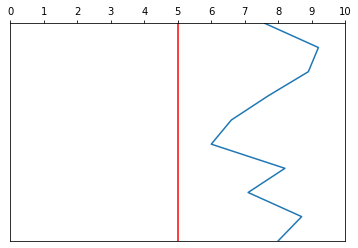

In [1]:
import matplotlib.pyplot as plt
import numpy as np

data = [8, 8.7, 7.1, 8.2, 6, 6.6, 7.7 , 8.9, 9.2, 7.6] #**data from user**

fig, ax = plt.subplots()  #create a figure containing a single axes

ax.xaxis.tick_top() #move x axis to the top

plt.xlim([0, 10]) #set a fixed range of value for x axis
plt.ylim([1, 10]) #set a fixed range of value for y axis

plt.xticks(np.arange(0, 11, 1)) #set frequency of tick marks for x axis
plt.yticks(np.arange(1, 11, 1)) #set frequency of tick marks for y axis

plt.axvline(x = 5, color = 'r', linestyle = '-') #add middle line

plt.tick_params(left = False, labelleft = False) #remove ticks on y axis

fixedYRange = np.arange(1, 11, 1) #set for range for the plot to locate the data points on y axis

ax.plot(data, fixedYRange)  #plot some data on the axes. (x, y)

plt.show()

# Generate Bar Chart

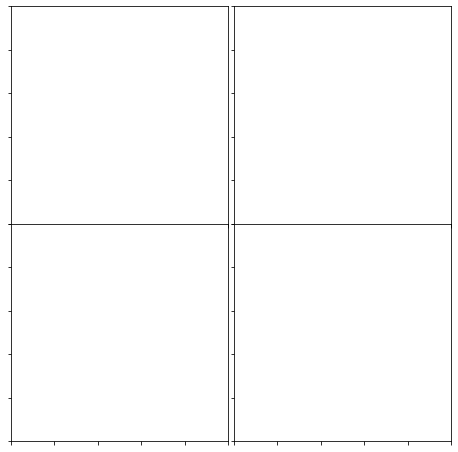

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8)) # Notice the equal aspect ratio
ax = [fig.add_subplot(2,2,i+1) for i in range(4)]

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_aspect('equal')

fig.subplots_adjust(wspace=0, hspace=0)

# Creating single file from single template

In [2]:
import os
import datetime as dt

from docxtpl import DocxTemplate, InlineImage
from docx2pdf import convert

# create a document object
doc = DocxTemplate(os.getcwd() + "\\templates\\inviteTmpl.docx")

# create context dictionary
context = {
    "todayStr": dt.datetime.now().strftime("%d-%b-%Y"),
    "recipientName": "Chaitanya",
    "evntDtStr": "21-Oct-2021",
    "venueStr": "the beach",
    "senderName": "Sanket",
}

# inject image into the context
context['bannerImg'] = InlineImage(doc, 'images/party_banner_0.png')

# render context into the document object
doc.render(context)

# save the document object as a word file
doc.save('invitation.docx')

# convert word file to a pdf file
convert('invitation.docx', 'invitation.pdf')

C:\Users\Andy\anaconda3\envs\Graphs\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 1/1 [00:02<00:00,  2.67s/it]


# Creating multiple files from single template

In [3]:
from docxtpl import DocxTemplate, InlineImage
import datetime as dt
from docx2pdf import convert

# template word file path
tmplPath = "templates/inviteTmpl.docx"

personNames = ["Aakav", "Aakesh", "Aarav",
               "Advik", "Chaitanya", "Chandran", "Darsh"]

# run for each person in a for loop
for pItr, p in enumerate(personNames):
    # create a document object
    doc = DocxTemplate(tmplPath)

    # create context dictionary
    context = {
        "todayStr": dt.datetime.now().strftime("%d-%b-%Y"),
        "recipientName": p,
        "evntDtStr": "21-Oct-2021",
        "venueStr": "the beach",
        "senderName": "Sanket",
    }

    # inject image into the context
    bannerImgPath = 'images/party_banner_{0}.png'.format(pItr % 3)
    imgObj = InlineImage(doc, bannerImgPath)
    context['bannerImg'] = imgObj

    # render context into the document object
    doc.render(context)

    # save the document object as a word file
    resultFilePath = 'invites/invitation_{0}.docx'.format(pItr)
    doc.save(resultFilePath)

    # convert the word file into pdf
    convert(resultFilePath, resultFilePath.replace('.docx', '.pdf'))

print("execution complete...")

100%|██████████| 1/1 [00:01<00:00,  1.94s/it]

execution complete...


# Reports Automation

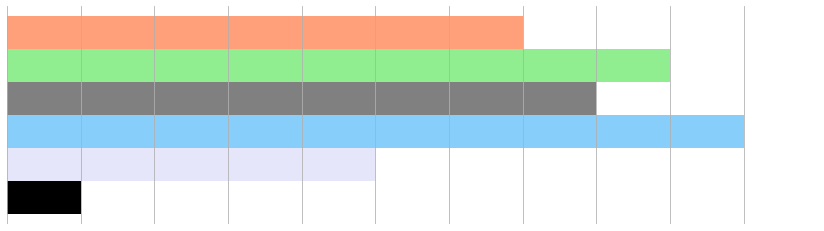





  0%|          | 0/1 [00:00<?, ?it/s]



100%|██████████| 1/1 [00:02<00:00,  2.21s/it]


In [14]:
import random
import jinja2
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from docx.shared import Mm
from docx2pdf import convert
from docxtpl import DocxTemplate, InlineImage
from pandas import Series, DataFrame
from matplotlib.ticker import FuncFormatter, MaxNLocator
from matplotlib.pyplot import figure

# create a document object
doc = DocxTemplate("templates/reportTmpl.docx")

# create data for reports
salesTblRows = []
for k in range(10):
    costPu = random.randint(1, 15)
    nUnits = random.randint(100, 500)
    salesTblRows.append({"sNo": k+1, "name": "Item "+str(k+1),
                         "cPu": costPu, "nUnits": nUnits, "revenue": costPu*nUnits})

topItems = [x["name"] for x in sorted(salesTblRows, key=lambda x: x["revenue"], reverse=True)][0:3]

todayStr = dt.datetime.now().strftime("%d-%b-%Y")

# inject image into the context
# step 1 - chart configuration
fig, ax = plt.subplots() #create a figure containing a single axes
fig.subplots_adjust(right = 2)
barWidth = 1.0 #adjust bar width
#fig.tight_layout() #adjust space in between
plt.tick_params(left = False, labelleft = False, bottom = False, labelbottom = False) #remove ticks on x & y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# step 2 - data
surveyResults = [1, 5, 10, 8, 9, 7] #survey results from user
ratersType = ('self', 'sup', 'peer', 'sub', 'allraters', 'norm') #set the labels of each raters type
y_pos = np.arange(len(ratersType)); #get coordinates of the bars

# step 3 - generate chart
ax.barh(y_pos, surveyResults, barWidth, align='edge', color=['black', 'lavender', 'lightskyblue', 'gray', 'lightgreen', 'lightsalmon']) #plot a horizontal bar chart
ax.set_yticks(y_pos) #set y axis
ax.xaxis.grid() #set gridline for x axis
plt.xlim([1, 11]) #set a fixed range of value for x axis
fixedXRange = np.arange(0, 11, 1) #set for range for the plot to locate the data points on x axis, FixedLocator error
ax.set_xticks(fixedXRange) #set x axis

# step 4 - display chart
plt.show()

# save into folder
fig.savefig("images/trendImg.png", bbox_inches='tight', transparent=True)

# create data for reports
surveyResults = [
    {
        'category': "Category 1",
        'questions': [
            {'questionTitle': 'Question A', 'ratingsImage': InlineImage(doc, 'images/trendImg.png', width=Mm(104), height=Mm(10)), 'self': 10, 'sup': 8, 'peer': 7, 'sub': 5, 'allraters': 5},
            {'questionTitle': 'Question B this is a very long question, i need to see what would happen if they write such a long question over here to see how to fit this whole long paragraph into the cell. long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long long', 'ratingsImage': InlineImage(doc, 'images/trendImg.png', width=Mm(104), height=Mm(10)), 'self': 9, 'sup': 7, 'peer': 8, 'sub': 7, 'allraters': 2},
        ],
        'norm': 10
    },
    {
        'category': "Category 2",
        'questions': [
            {'questionTitle': 'Question C', 'ratingsImage': InlineImage(doc, 'images/trendImg.png', width=Mm(104), height=Mm(10)), 'self': 5, 'sup': 9, 'peer': 4, 'sub': 3, 'allraters': 5},
            {'questionTitle': 'Question D', 'ratingsImage': InlineImage(doc, 'images/trendImg.png', width=Mm(104), height=Mm(10)), 'self': 6, 'sup': 7, 'peer': 8, 'sub': 5, 'allraters': 6},
            {'questionTitle': 'Question E', 'ratingsImage': InlineImage(doc, 'images/trendImg.png', width=Mm(104), height=Mm(10)), 'self': 10, 'sup': 8, 'peer': 7, 'sub': 5, 'allraters': 8},
        ],
        'norm': 8
    }
]

surveyResults2 = surveyResults

# create context to pass data to template
context = {
    "reportDtStr": todayStr,
    "salesTblRows": salesTblRows,
    "topItemsRows": topItems,
    "surveyResults": surveyResults,
    "surveyResults2": surveyResults2
}

# render context into the document object
doc.render(context)

# save the document object as a word file
reportWordPath = 'reports/report_{0}.docx'.format(todayStr)
doc.save(reportWordPath)

# convert the word file as pdf file
convert(reportWordPath, reportWordPath.replace(".docx", ".pdf"))